In [5]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='example_data.csv', 
    header=None, 
    sep=',')

df = df.transpose()

df.rows=['Linearity', 'Products & Markets', 'Software Design', 'Mechanics']

df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


,0,1,2,3,4,5,6,7
0,8.0,9.0,6.0,8.0,6.0,6.0,15.0,4.0
1,2.5,6.0,2.0,8.0,2.0,2.0,8.0,9.0
2,20.0,10.0,5.0,8.0,6.0,6.0,13.0,6.5
3,6.5,5.0,4.0,3.0,6.0,5.0,8.5,6.5


In [4]:
import numpy as np
x = np.matrix(df.ix[:,0:8].values.reshape((4, 8)))
x.mean(1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


matrix([[ 7.75  ],
        [ 4.9375],
        [ 9.3125],
        [ 5.5625]])

In [6]:
X = df.ix[:,0:8].values
print(X)

[[  8.    9.    6.    8.    6.    6.   15.    4. ]
 [  2.5   6.    2.    8.    2.    2.    8.    9. ]
 [ 20.   10.    5.    8.    6.    6.   13.    6.5]
 [  6.5   5.    4.    3.    6.    5.    8.5   6.5]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [3]:
print(np.std([  8.,  9.  ,  6. ,   8.  ,  6.  ,  6.  , 15.   , 4. ]))

NameError: name 'np' is not defined

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X.T)
X_std = X_std.T

In [8]:
print(X_std)

[[ 0.08032193  0.40160966 -0.56225353  0.08032193 -0.56225353 -0.56225353
   2.32933605 -1.20482899]
 [-0.83471408  0.36384973 -1.00593748  1.04874333 -1.00593748 -1.00593748
   1.04874333  1.39119013]
 [ 2.26276801  0.14555818 -0.91304674 -0.27788379 -0.70132576 -0.70132576
   0.78072113 -0.59546527]
 [ 0.58971085 -0.35382651 -0.98285142 -1.61187632  0.2751984  -0.35382651
   1.84776066  0.58971085]]


In [9]:
import numpy as np
mean_vec = np.mean(X_std, axis=1)
# print(mean_vec.T.reshape(4,1))
v = mean_vec[:, np.newaxis]
print(v)
print(X_std)
cov_mat = (X_std).dot((X_std).T) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

[[  0.00000000e+00]
 [ -6.93889390e-18]
 [  0.00000000e+00]
 [  0.00000000e+00]]
[[ 0.08032193  0.40160966 -0.56225353  0.08032193 -0.56225353 -0.56225353
   2.32933605 -1.20482899]
 [-0.83471408  0.36384973 -1.00593748  1.04874333 -1.00593748 -1.00593748
   1.04874333  1.39119013]
 [ 2.26276801  0.14555818 -0.91304674 -0.27788379 -0.70132576 -0.70132576
   0.78072113 -0.59546527]
 [ 0.58971085 -0.35382651 -0.98285142 -1.61187632  0.2751984  -0.35382651
   1.84776066  0.58971085]]
Covariance matrix 
[[ 2.66666667  0.87560732  1.35196417  1.32205766]
 [ 0.87560732  2.66666667  0.06419552  0.50486149]
 [ 1.35196417  0.06419552  2.66666667  1.25825249]
 [ 1.32205766  0.50486149  1.25825249  2.66666667]]


In [10]:
# cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.58595496  0.72046401  0.36044213  0.0875778 ]
 [ 0.28674255 -0.36932652  0.05775918  0.88206604]
 [ 0.52259242 -0.586703    0.43098886 -0.44376272]
 [ 0.54893776 -0.01758175 -0.82522357 -0.13177356]]

Eigenvalues 
[ 5.53945996  1.08458829  1.39673388  2.64588454]


In [25]:
u,s,v = np.linalg.svd(X_std)
# u = u*-1
# u[:,1] = u[:,1]*-1
# u[:,3] = u[:,3]*-1
u

array([[-0.58595496,  0.0875778 , -0.36044213,  0.72046401],
       [-0.28674255,  0.88206604, -0.05775918, -0.36932652],
       [-0.52259242, -0.44376272, -0.43098886, -0.586703  ],
       [-0.54893776, -0.13177356,  0.82522357, -0.01758175]])

In [11]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
# eig_pairs = [(np.abs(s[i]), u[:,i], v[:,i]) for i in range(len(eig_vals))]
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.53945996212
2.64588454208
1.39673387644
1.08458828603


In [27]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs2 = [(np.abs(s[i]), u[:,i], v[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs2.sort()
eig_pairs2.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Singular values in descending order:')
for i in eig_pairs2:
    print(i[0])

Singular values in descending order:
4.07656471632
2.81738418151
2.04699819964
1.80381951927


In [13]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

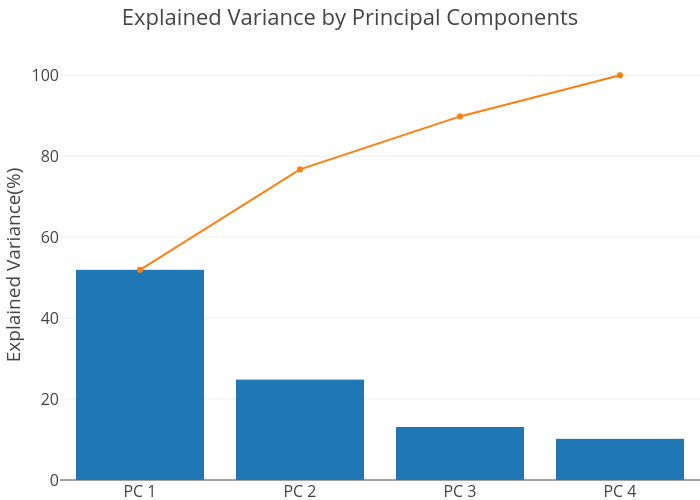

In [56]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,18)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,18)], 
        y=cum_var_exp,
        showlegend=False)

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained Variance(%)'),
        title='Explained Variance by Principal Components',
        margin=dict(t=50, b=20, r=0, l=60, autoexpand=False),
        font=dict(size=16)
        )

fig = Figure(data=data, layout=layout)
# py.iplot(fig)

py.image.save_as(fig, filename='Ex_var.png')

from IPython.display import Image
Image('Ex_var.png')

In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

# matrix_w = np.hstack((eig_pairs[0][2].reshape(4,1), 
#                       eig_pairs[1][2].reshape(4,1)))

print('Matrix W:\n', matrix_w)
# print('Matrix T:\n', matrix_t)

Matrix W:
 [[ 0.58595496  0.0875778 ]
 [ 0.28674255  0.88206604]
 [ 0.52259242 -0.44376272]
 [ 0.54893776 -0.13177356]]


In [28]:
matrix_w2 = np.hstack((eig_pairs2[0][1].reshape(4,1), 
                      eig_pairs2[1][1].reshape(4,1)))

# matrix_w = np.hstack((eig_pairs[0][2].reshape(4,1), 
#                       eig_pairs[1][2].reshape(4,1)))

print('Matrix W:\n', matrix_w2)
# print('Matrix T:\n', matrix_t)

Matrix W:
 [[-0.58595496  0.0875778 ]
 [-0.28674255  0.88206604]
 [-0.52259242 -0.44376272]
 [-0.54893776 -0.13177356]]


In [20]:
Y = X_std.T.dot(matrix_w)
Y

array([[ 1.31393695, -1.81107891],
       [ 0.22149524,  0.33814327],
       [-1.63457588, -0.40185429],
       [-0.68225537,  1.26781244],
       [-0.83334105, -0.66158587],
       [-1.17863658, -0.57869702],
       [ 3.08790988,  0.53911809],
       [-0.29453319,  1.30814229]])

In [29]:
Y2 = X_std.T.dot(matrix_w2)
Y2

array([[-1.31393695, -1.81107891],
       [-0.22149524,  0.33814327],
       [ 1.63457588, -0.40185429],
       [ 0.68225537,  1.26781244],
       [ 0.83334105, -0.66158587],
       [ 1.17863658, -0.57869702],
       [-3.08790988,  0.53911809],
       [ 0.29453319,  1.30814229]])

In [21]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.5.1


In [22]:
init_notebook_mode(connected=True)

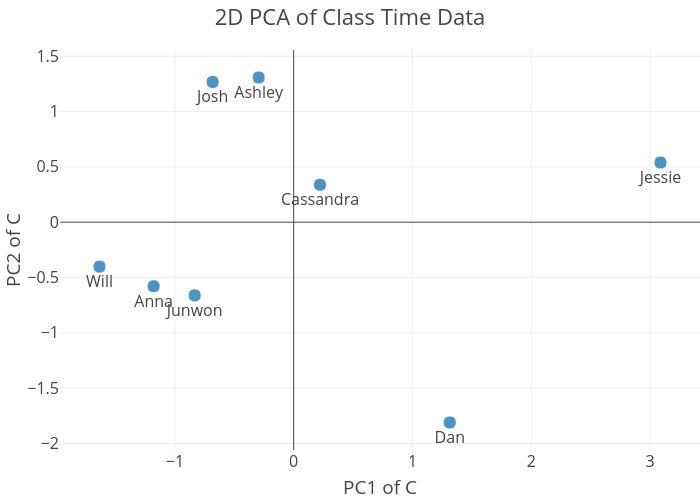

In [60]:
import plotly.graph_objs as go

traces = []

trace1 = go.Scatter(
    x=Y[:,0],
    y=Y[:,1],
    mode='markers+text',
    text=['Dan', 'Cassandra', 'Will', 'Josh', 'Junwon', 'Anna', 'Jessie', 'Ashley'],
    textposition='bottom',
    marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))

traces.append(trace1)


data = Data(traces)

# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
# )
layout = Layout(showlegend=False,
                xaxis=dict(title='PC1 of C',),
                yaxis=dict(title='PC2 of C',),
                title='2D PCA of Class Time Data',
                margin=dict(t=50, b=50, r=0, l=60, autoexpand=False),
                font=dict(size=16)
                )

fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='2d-PCA')
py.image.save_as(fig, filename='PCA_class.png')

from IPython.display import Image
Image('PCA_class.png')

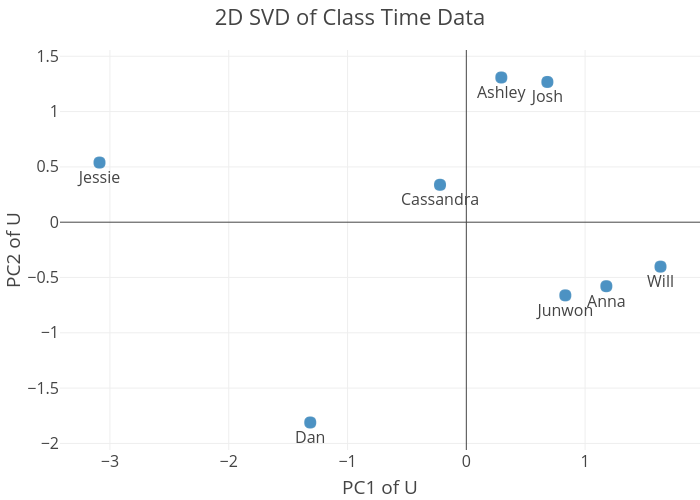

In [61]:
import plotly.graph_objs as go

traces = []

trace1 = go.Scatter(
    x=Y2[:,0],
    y=Y2[:,1],
    mode='markers+text',
    text=['Dan', 'Cassandra', 'Will', 'Josh', 'Junwon', 'Anna', 'Jessie', 'Ashley'],
    textposition='bottom',
    marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))

traces.append(trace1)


data = Data(traces)

# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
# )
layout = Layout(showlegend=False,
                xaxis=dict(title='PC1 of U',),
                yaxis=dict(title='PC2 of U',),
                title='2D SVD of Class Time Data',
                margin=dict(t=50, b=50, r=0, l=60, autoexpand=False),
                font=dict(size=16)
                )

fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='2d-PCA')
py.image.save_as(fig, filename='SVD_class.png')

from IPython.display import Image
Image('SVD_class.png')

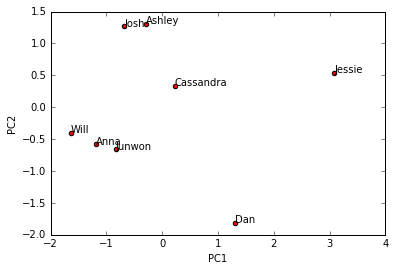

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)

names = ['Dan', 'Cassandra', 'Will', 'Josh', 'Junwon', 'Anna', 'Jessie', 'Ashley']

ax.scatter(Y[:,0].tolist(), Y[:,1].tolist(), c='r', marker='o')

for label, x, y in zip(names, Y[:,0].tolist(), Y[:,1].tolist()):
    plt.annotate(
        label,
        xy=(x, y))


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()
fig.savefig('2d_pca.png', bbox_inches='tight')